In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [73]:
x_0 = tf.random.normal([20],3,1)
x_1 = tf.random.normal([20],5,1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

print(x_0)
print(x_1)

x = tf.concat([x_0,x_1], axis = 0)
y = tf.concat([y_0,y_1], axis = 0)

# print(x)
# print(y)

tf.Tensor(
[3.611819  3.4919758 5.179533  3.8756375 2.356091  2.8096159 2.8802154
 1.6680648 4.8938746 1.7074146 3.6219485 3.4323347 1.8443159 1.8465003
 3.8686295 3.3044791 3.2721012 2.3017523 1.9158353 1.4071784], shape=(20,), dtype=float32)
tf.Tensor(
[3.8228216 4.0967407 5.841961  4.9312906 4.038381  4.4846697 7.446146
 6.3048525 2.7995608 5.604592  4.435397  5.1028275 4.172351  5.4899297
 5.7218027 3.6136322 5.831024  5.2741456 4.5736675 5.497121 ], shape=(20,), dtype=float32)


In [56]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None:
        plt.title(str_title, fontsize = 20, pad = 20)
    plt.plot(X,Y, ls = 'none', marker = 'x')
    
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
#     plt.tick_params(axis = 'both', labelsize = 14)

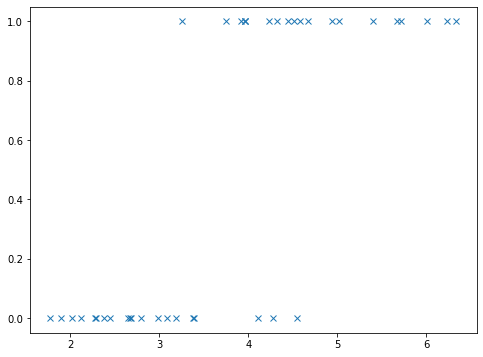

In [57]:
plot_graph(x,y)

In [58]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return -tf.reduce_sum(y_true*tf.math.log(y_pred)+(1-y_true)*tf.math.log(1-y_pred))
    

In [70]:
lr = 0.005
optimizer = tf.optimizers.SGD(lr)

def run_optimization():
    with tf.GradientTape() as g:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))

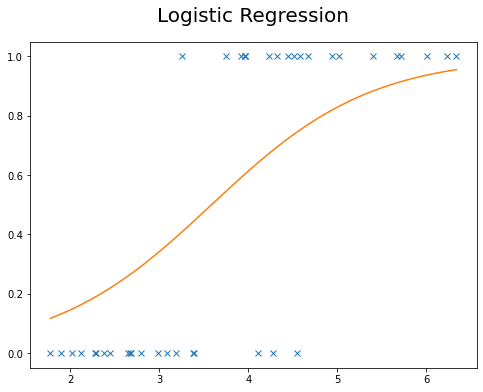

In [64]:
x_fl = np.linspace(np.min(x), np.max(x), 40)
plot_graph(x,y,X_hat = x_fl, Y_hat = 1/(1+tf.exp(-1*(W*x_fl+b))), str_title = "Logistic Regression")

In [61]:
training_steps = 1000
display_step = 100
for step in range(1, training_steps +1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        
        print("step : ", step, "loss : ",loss.numpy())
        
end_step = step

step :  100 loss :  32.563435
step :  200 loss :  29.826601
step :  300 loss :  27.525625
step :  400 loss :  25.597702
step :  500 loss :  23.982178
step :  600 loss :  22.624592
step :  700 loss :  21.478355
step :  800 loss :  20.504845
step :  900 loss :  19.672613
step :  1000 loss :  18.956327


In [63]:
training_steps = 1000
display_step = 100
for step in range(end_step+1, end_step+training_steps +1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        
        print("step : ", step, "loss : ",loss.numpy())
        
end_step = step

step :  1100 loss :  18.335674
step :  1200 loss :  17.794361
step :  1300 loss :  17.319286
step :  1400 loss :  16.899889
step :  1500 loss :  16.52759
step :  1600 loss :  16.195396
step :  1700 loss :  15.897562
step :  1800 loss :  15.629339
step :  1900 loss :  15.386784
step :  2000 loss :  15.166592


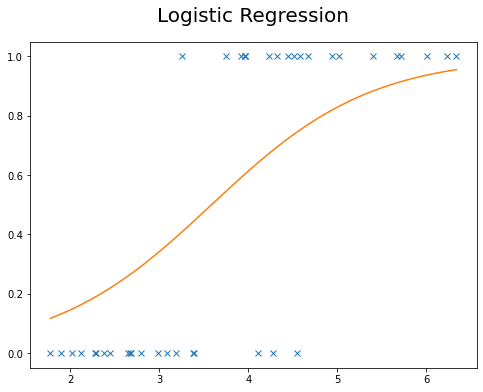

In [67]:
x_fl = np.linspace(np.min(x), np.max(x), 40)
plot_graph(x,y,X_hat = x_fl, Y_hat = 1/(1+tf.exp(-1*(W*x_fl+b))), str_title = "Logistic Regression")

In [71]:
training_steps = 10000
display_step = 500
for step in range(end_step+1, end_step+training_steps +1):
    run_optimization()
    
    if step % display_step == 0:
        pred = 1/(1+tf.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        
        print("step : ", step, "loss : ",loss.numpy())
        
end_step = step

step :  12500 loss :  11.802744
step :  13000 loss :  11.770498
step :  13500 loss :  11.751936
step :  14000 loss :  11.740942
step :  14500 loss :  11.734299
step :  15000 loss :  11.730219
step :  15500 loss :  11.727684
step :  16000 loss :  11.726097
step :  16500 loss :  11.725095
step :  17000 loss :  11.72446
step :  17500 loss :  11.724054
step :  18000 loss :  11.723795
step :  18500 loss :  11.723628
step :  19000 loss :  11.723522
step :  19500 loss :  11.7234535
step :  20000 loss :  11.72341
step :  20500 loss :  11.723381
step :  21000 loss :  11.723363
step :  21500 loss :  11.723352
step :  22000 loss :  11.723345


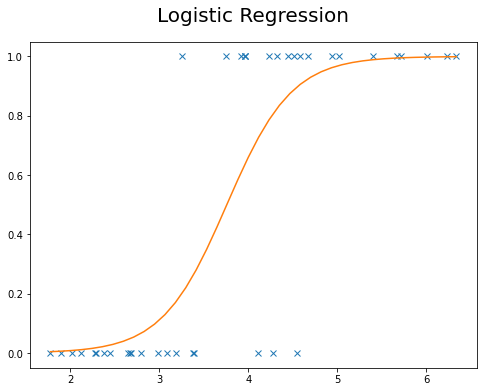

In [72]:
x_fl = np.linspace(np.min(x), np.max(x), 40)
plot_graph(x,y,X_hat = x_fl, Y_hat = 1/(1+tf.exp(-1*(W*x_fl+b))), str_title = "Logistic Regression")